In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Fingertips\python\uber-raw-data-sep14.csv')
df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [3]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime)

In [4]:
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)


In [5]:
df["Date/Time"]

0         2014-09-01 00:01:00
1         2014-09-01 00:01:00
2         2014-09-01 00:03:00
3         2014-09-01 00:06:00
4         2014-09-01 00:11:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 1028136, dtype: datetime64[ns]

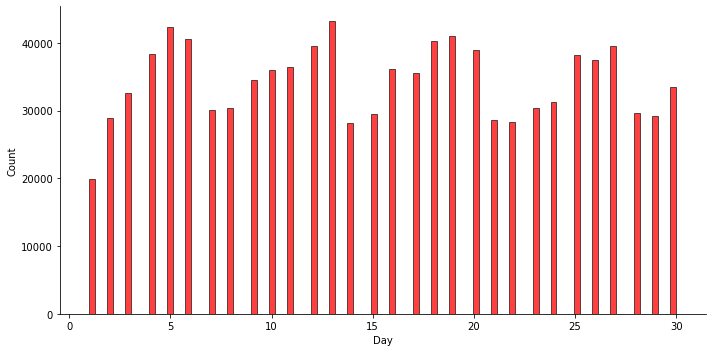

In [6]:
sns.displot(df['Day'],kind='hist', color="red",aspect=2)


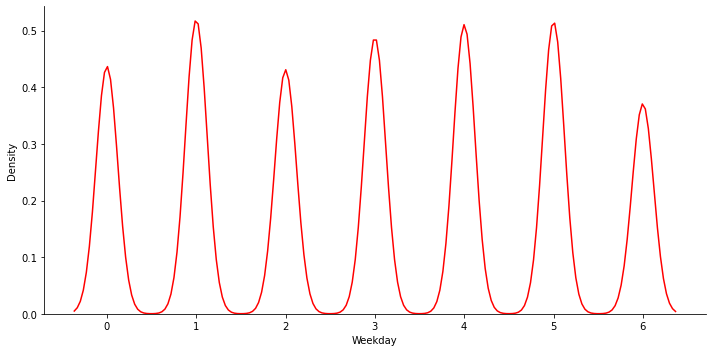

In [7]:
sns.displot(df['Weekday'],kind='kde', color="red",aspect=2)

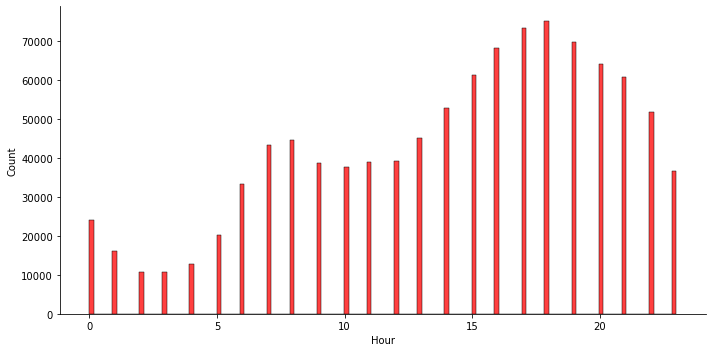

In [8]:
sns.displot(df['Hour'],kind='hist', color="red",aspect=2)

In [9]:
xy = df.groupby(['Weekday','Hour']).apply(lambda x:len(x))

In [10]:
xy

Weekday  Hour
0        0       1885
         1       1201
         2        977
         3       1780
         4       2479
                 ... 
6        19      6430
         20      5930
         21      5164
         22      4115
         23      2326
Length: 168, dtype: int64

In [11]:
xy=xy.unstack()

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

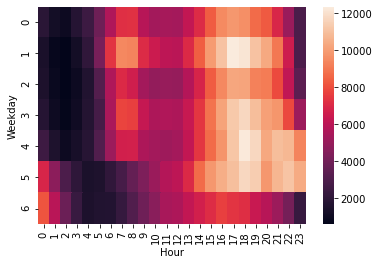

In [12]:
sns.heatmap(xy,annot=False)

<AxesSubplot:title={'center':'Uber tips analysis'}, xlabel='Lon', ylabel='Lat'>

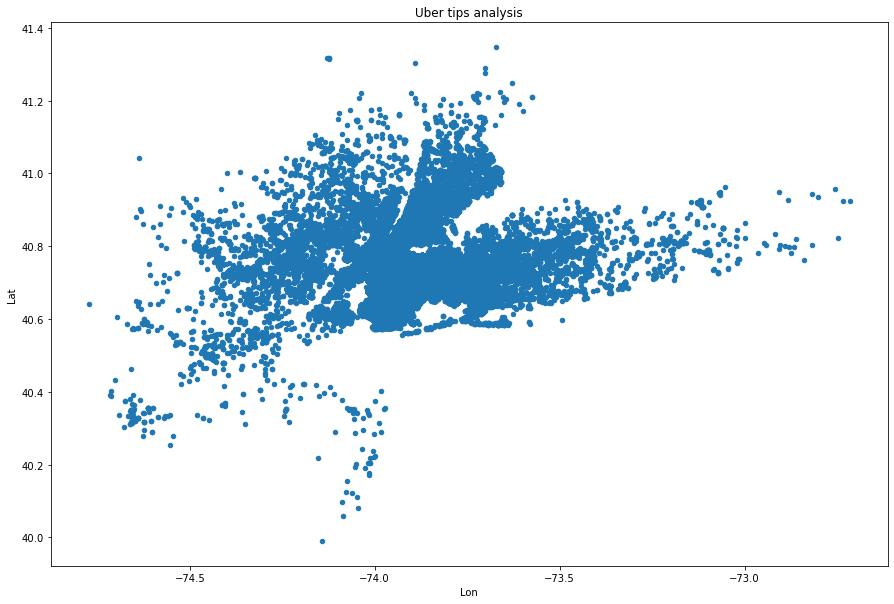

In [13]:
df.plot(x='Lon', y='Lat', kind='scatter', title='Uber tips analysis',style=['Day'],figsize=(15,10))